In [32]:
from pandas import read_csv, datetime, DataFrame
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [11]:
sales = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [12]:
sales.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales')

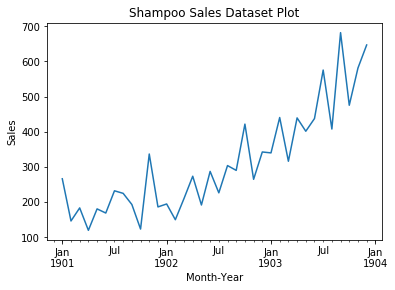

In [14]:
sales.plot()
pyplot.title('Shampoo Sales Dataset Plot')
pyplot.xlabel('Month-Year')
pyplot.ylabel('Sales')

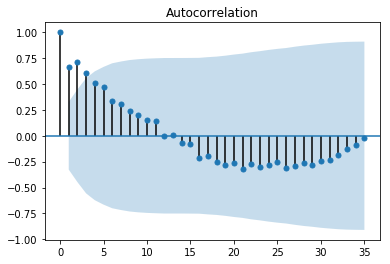

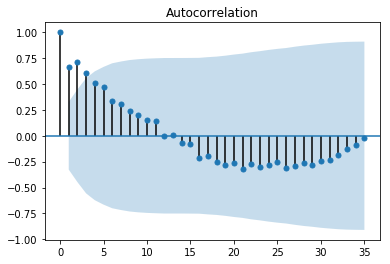

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

# Converting series to stationary

In [16]:
sales.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [17]:
sales.shift(1)

Month
1901-01-01      NaN
1901-02-01    266.0
1901-03-01    145.9
1901-04-01    183.1
1901-05-01    119.3
1901-06-01    180.3
1901-07-01    168.5
1901-08-01    231.8
1901-09-01    224.5
1901-10-01    192.8
1901-11-01    122.9
1901-12-01    336.5
1902-01-01    185.9
1902-02-01    194.3
1902-03-01    149.5
1902-04-01    210.1
1902-05-01    273.3
1902-06-01    191.4
1902-07-01    287.0
1902-08-01    226.0
1902-09-01    303.6
1902-10-01    289.9
1902-11-01    421.6
1902-12-01    264.5
1903-01-01    342.3
1903-02-01    339.7
1903-03-01    440.4
1903-04-01    315.9
1903-05-01    439.3
1903-06-01    401.3
1903-07-01    437.4
1903-08-01    575.5
1903-09-01    407.6
1903-10-01    682.0
1903-11-01    475.3
1903-12-01    581.3
Name: Sales, dtype: float64

In [18]:
sales_diff = sales.diff(periods=1)
#integrated of order 1, denoted by d(for diff), one of the parameter of ARIMA model

In [19]:
sales_diff = sales_diff[1:]
sales_diff.head()

Month
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
Name: Sales, dtype: float64

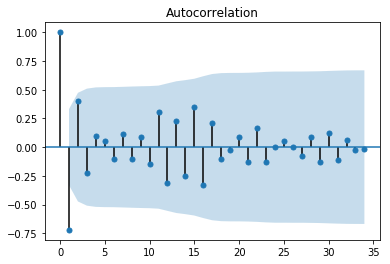

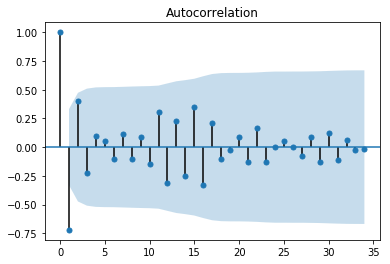

In [20]:
plot_acf(sales_diff)

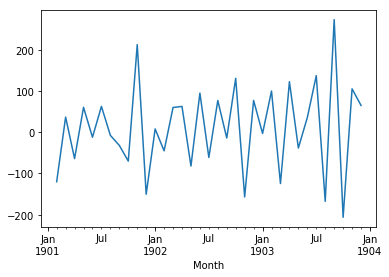

In [21]:
sales_diff.plot()

In [22]:
X = sales.values
train = X[0:28] # 27 data as train data
test = X[28:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28
8


# ARIMA Model

In [30]:
# fit an ARIMA(5,1,0) model. 
# This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, 
# and uses a moving average model of 0.
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary()) 

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Fri, 07 Jun 2019   AIC                            406.340
Time:                        13:38:58   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

Text(0.5, 1.0, 'ARIMA Fit Residual Error Line Plot')

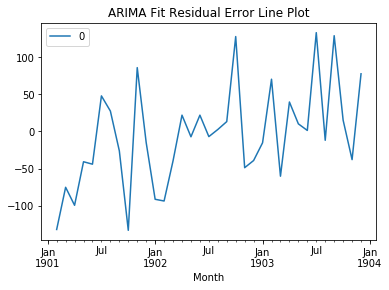

In [33]:
# plot residual errors, shows that there are still some information which is not captured by the model.
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.title('ARIMA Fit Residual Error Line Plot')

Text(0.5, 1.0, 'ARIMA Fit Residual Error Density Plot')

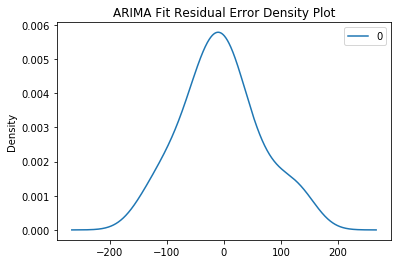

In [34]:
# density plot of the residual error values, shows that the errors are Gaussian, but may not be centered on zero.
residuals.plot(kind='kde')
pyplot.title('ARIMA Fit Residual Error Density Plot')

In [23]:
from statsmodels.tsa.arima_model import ARIMA

import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [25]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 335.09040511436183
(0, 0, 1) 334.3872829957554
(0, 0, 2) 329.31881164853866
(0, 0, 3) 330.92416191319046
(0, 0, 4) nan
(0, 0, 5) nan
(0, 1, 0) 324.4220452613395
(0, 1, 1) 308.0017050784539
(0, 1, 2) 306.7698573618047
(0, 2, 0) 343.4502397203673
(0, 2, 1) 318.26218827679946
(1, 0, 0) 330.89180942559716
(1, 0, 1) 325.63339493771554
(1, 0, 2) 322.452435784985
(1, 0, 4) 324.2380212596486
(1, 1, 0) 309.1188767752589
(1, 1, 1) 306.79093608908283
(1, 1, 2) 306.91086651444687
(1, 1, 3) 311.8713030852165
(1, 1, 4) 309.119460681394
(1, 1, 5) 314.62738257876856
(1, 2, 0) 317.80308367611093
(1, 2, 1) 304.2885462718525
(1, 2, 4) 301.8424351037566
(2, 0, 0) 322.09349459126526
(2, 0, 1) 332.6125126521117
(2, 1, 0) 310.4797159942327
(2, 1, 1) 308.67508697382726
(2, 1, 4) 310.73924673717534
(2, 1, 5) 309.2613029479653
(2, 2, 0) 317.24389670047566
(2, 2, 1) 305.7053644719475
(2, 2, 3) 301.9734154335286
(3, 0, 0) 324.0564894639567
(3, 1, 0) 305.21331482411324
(3, 1, 1) 306.4702994791246
(3, 1, 

It seems that out of different combinations ranging from order (0,0,0) to (5,5,5) param with values as p=3, d=2 and q=3 is the best because of lowest AIC value

In [26]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(3,2,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

298.7706871607531


In [27]:
predictions = model_arima_fit.forecast(steps=8)[0]
predictions

array([334.25602577, 464.32659025, 426.09490955, 496.34479871,
       443.78979395, 500.24046746, 504.44730005, 564.70607074])

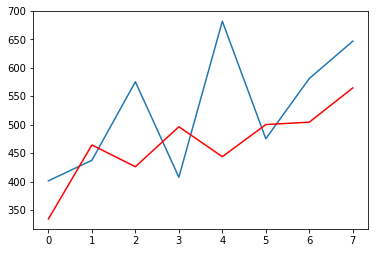

In [28]:
plt.plot(test)
plt.plot(predictions, color='red')

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

13180.72059677319